# Building a CNN for MNIST

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape data to add a channel dimension (needed for CNNs)
X_train = X_train.reshape(-1, 28, 28, 1)  # (num_samples, height, width, channels)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Check dataset shape
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (60000, 28, 28, 1)
Testing Data Shape: (10000, 28, 28, 1)


In [4]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  # Conv layer with 32 filters
    keras.layers.MaxPooling2D((2,2)),  # Max pooling reduces spatial dimensions
    keras.layers.Conv2D(64, (3,3), activation='relu'),  # Second Conv layer
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Flatten(),  # Flatten feature maps into a 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.9053 - loss: 0.3042 - val_accuracy: 0.9864 - val_loss: 0.0454
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9857 - loss: 0.0459 - val_accuracy: 0.9871 - val_loss: 0.0399
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9905 - loss: 0.0301 - val_accuracy: 0.9866 - val_loss: 0.0443
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9934 - loss: 0.0196 - val_accuracy: 0.9902 - val_loss: 0.0307
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9922 - val_loss: 0.0246
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9903 - val_loss: 0.0332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9976 - loss: 0.0081 - val_accuracy: 0.9933 - val_loss: 0.0248
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9979 -

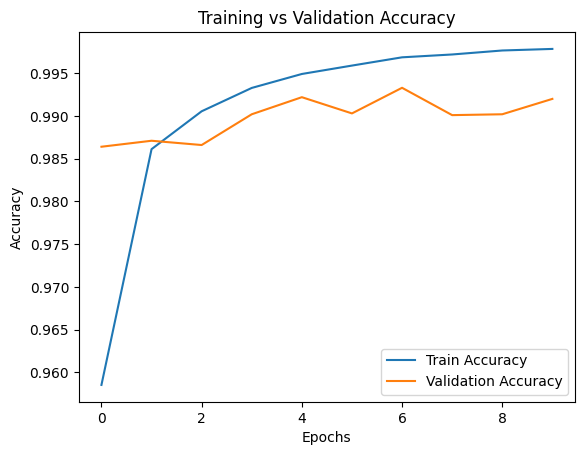

In [7]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [8]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9894 - loss: 0.0518
Test Accuracy: 99.20%


# Improving the Existing CNN (MNIST)

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# Build improved CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.BatchNormalization(),  # Normalizes activations for stable training
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),  # Drops random neurons to prevent overfitting

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation='softmax')  # Output layer
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.8789 - loss: 0.4010 - val_accuracy: 0.9851 - val_loss: 0.0463
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9708 - loss: 0.0948 - val_accuracy: 0.9858 - val_loss: 0.0408
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9766 - loss: 0.0750 - val_accuracy: 0.9895 - val_loss: 0.0293
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9813 - loss: 0.0611 - val_accuracy: 0.9909 - val_loss: 0.0272
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9851 - loss: 0.0516 - val_accuracy: 0.9919 - val_loss: 0.0238
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9838 - loss: 0.0536 - val_accuracy: 0.9912 - val_loss: 0.0258
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9906 - val_loss: 0.0285
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9858 -